Autor: Vinicius Mari Marrafon

In [7]:
from mia.algebra import *
from mia.model import *
from mia.data import *

In [9]:
# Data visualization
import matplotlib.pyplot as plt

### A Base de dados

A base de dados foi tirado das notas de aulas da disciplina de estatística que eu fiz durante a graduação

In [29]:
observations = {
  '1': [0.0, 4.0],
  '2': [1.0, 6.5],
  '3': [1.0, 7.5],
  '4': [2.0, 5.5],
  '5': [2.0, 6.0],
  '6': [2.5, 9.5],
  '7': [3.0, 7.0],
  '8': [4.0, 9.0],
}

# Um conjunto maior de observações: Modelo demorada para ser otimizado
# Motivação: Trabalhar na otimização 
# observations = {
#     '1':  [0.0,  1.0],
#     '2':  [0.5,  0.9],
#     '3':  [1.0,  0.7],
#     '4':  [1.5,  1.5],
#     '5':  [1.9,  2.0],
#     '6':  [2.5,  2.4],
#     '7':  [3.0,  3.2],
#     '8':  [3.5,  2.0],
#     '9':  [4.0,  2.7],
#     '10': [4.5,  3.5],
#     '11': [5.0,  1.0],
#     '12': [5.5,  4.0],
#     '13': [6.0,  3.6],
#     '14': [6.6,  2.7],
#     '15': [7.0,  5.7],
#     '16': [7.6,  4.6],
#     '17': [8.5,  6.0],
#     '18': [9.0,  6.8],
#     '19': [10.0, 7.3]
# }

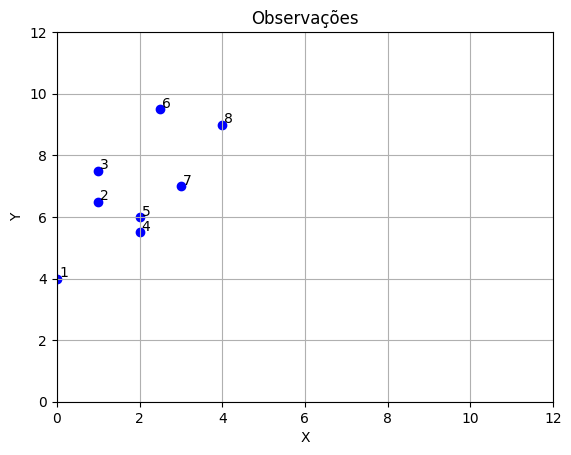

In [31]:
x = [value[0] for value in observations.values()]
y = [value[1] for value in observations.values()]

plt.scatter(x, y, color='blue', marker='o')
for label, (xi, yi) in observations.items():
    plt.text(xi + 0.05, yi + 0.05, label) 

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Observações')

plt.grid(True)
plt.xlim(0, 5)
plt.ylim(0, 10)
plt.show()

## Modelo de Programação Linear 1

O primeiro modelo consiste em minimizar a soma dos erros negativos e positivos da reta em relação aos pontos. O erro negativo está associado ao quanto o nosso modelo superestimou a previsão e o erro positivo, de maneira análoga, associado ao quanto o modelo subestimou a previsão. Em termos de <strong>Programação Linear</strong>, podemos modelar da seguinte maneira

$$\textbf{Minimizar }\sum_{i=1}^{N} (u_i + v_i)$$

Onde $N$ é o número de observações do nosso conjunto de dados, que para o nosso exemplo são $8$, $u_i$ é o erro postivo e $v_i$ é o erro negativo. O objetivo do modelo é <strong>encontrar os coeficientes $A$ e $B$ da reta que minimize a soma dos erros em todas as observações! </strong>. Em termos de programação linear, isto é adicionar as seguintes restrições para o modelo.

$$\textbf{Sujeito a } = \begin{cases}Ax_1 + B + u_1 - v_1 = y_1 \\ Ax_2 + B + u_2 - v_2 = y_2  \\ \vdots \\ Ax_8 + B + u_8 - v_8 = y_8 \end{cases}$$

No <strong>mia</strong>, fica

In [53]:
model = Model()

a = Variable(name='A', bounds=(-float('inf'), float('inf')))
b = Variable(name='B', bounds=(-float('inf'), float('inf')))

# Adicione a variavel no modelo
model.add_var(a)
model.add_var(b)

objective = Expression()

for index, observation in observations.items():
  u = Variable(name=f'u{index}', bounds=(0, float('inf')))
  v = Variable(name=f'v{index}', bounds=(0, float('inf')))

  # # Adicionando as variaveis no modelo (sao diferentes a cada iteracao)
  model.add_var(u)
  model.add_var(v)

  # Adicionando as restricoes no modelo (repare que a e b sao UNICAS)
  model.add_constr(observation[0] * a + b + (u - v) == observation[1])

  # Somando a soma dos erros na funcao objetivo do modelo
  objective += (u + v)

model.set_objective(objective)
model

1*u1 + 1*v1 + 1*u2 + 1*v2 + 1*u3 + 1*v3 + 1*u4 + 1*v4 + 1*u5 + 1*v5 + 1*u6 + 1*v6 + 1*u7 + 1*v7 + 1*u8 + 1*v8
Subject to:
	0.0*A + 1*B + -1*v1 + 1*u1 == 4.0
	1.0*A + 1*B + -1*v2 + 1*u2 == 6.5
	1.0*A + 1*B + -1*v3 + 1*u3 == 7.5
	2.0*A + 1*B + -1*v4 + 1*u4 == 5.5
	2.0*A + 1*B + -1*v5 + 1*u5 == 6.0
	2.5*A + 1*B + -1*v6 + 1*u6 == 9.5
	3.0*A + 1*B + -1*v7 + 1*u7 == 7.0
	4.0*A + 1*B + -1*v8 + 1*u8 == 9.0
	A: (-inf, inf)
	B: (-inf, inf)
	u1: (0, inf)
	v1: (0, inf)
	u2: (0, inf)
	v2: (0, inf)
	u3: (0, inf)
	v3: (0, inf)
	u4: (0, inf)
	v4: (0, inf)
	u5: (0, inf)
	v5: (0, inf)
	u6: (0, inf)
	v6: (0, inf)
	u7: (0, inf)
	v7: (0, inf)
	u8: (0, inf)
	v8: (0, inf)

O print acima nos mostra a estrutura do modelo. Podemos observar que as restrições relacionam o coeficiente linear, angular e os erros ao dado observado para cada observação!

In [55]:
# Rodando o algoritmo SIMPLEX com o objetivo de Minimizar
f, sol = model.optimize(OBJECTIVE.MINIMIZE)

O algoritmo "printa" passo a passo do processo de otimização pelo método SIMPLEX revisado na tableau (Muito útil para estudar o algoritmo)

In [57]:
if model.status == STATUS.OPTIMAL:
    print (f"f* = {f}")
    print (f"{sol[a]}x + {sol[b]} = y")
else:
    print (model.status)

f* = 8.125
1.25x + 3.999999999999999 = y


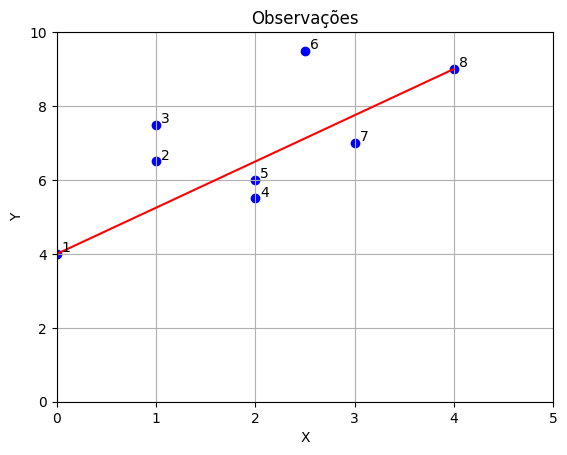

In [59]:
x = [value[0] for value in observations.values()]
y = [value[1] for value in observations.values()]

y_pred = [sol[a] * x_i[0] + sol[b] for x_i in observations.values()]

plt.scatter(x, y, color='blue', marker='o')
plt.plot(x, y_pred, color='red')
for label, (xi, yi) in observations.items():
    plt.text(xi + 0.05, yi + 0.05, label) 

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Observações')

plt.grid(True)
plt.xlim(0, 5)
plt.ylim(0, 10)
plt.show()

## Modelo de Programação Linear 2

O segundo modelo consiste em minimizar o <strong>máximo erro</strong> da reta em relação aos pontos. Isso é, o modelo irá apenas considerar qual dos erros positivos ou negativos é maior. Em termos de <strong>Programação Linear</strong>, podemos modelar da seguinte maneira.

$$\textbf{Minimizar }z$$

Onde $z$ estará sujeito as seguintes restrições:

$$\begin{cases}z \ge u_i \\ z \ge v_i\end{cases}$$

Isso garante que $z$ sempre ira considerar o maior dos dois error $u_i$ e $v_i$. As demais restrições para cada observação se mantém.

No <strong>mia</strong>, fica

In [41]:
model = Model()

a = Variable(name='A', bounds=(-float('inf'), float('inf')))
b = Variable(name='B', bounds=(-float('inf'), float('inf')))

z = Variable(name='Z')

# Adicione a variavel no modelo
model.add_var(a)
model.add_var(b)
model.add_var(z)

objective = Expression()

for index, observation in observations.items():
  u = Variable(name=f'u{index}', bounds=(0, float('inf')))
  v = Variable(name=f'v{index}', bounds=(0, float('inf')))

  # # Adicionando as variaveis no modelo (sao diferentes a cada iteracao)
  model.add_var(u)
  model.add_var(v)

  # Adicionando as restricoes no modelo (repare que a e b sao UNICAS)
  model.add_constr(observation[0] * a + b + (u - v) == observation[1])

  # Restricao do Z
  model.add_constr(z >= u)
  model.add_constr(z >= v)

model.set_objective(z)
model

1*Z
Subject to:
	0.0*A + 1*B + -1*v1 + 1*u1 == 4.0
	-1*u1 + 1*Z >= 0
	-1*v1 + 1*Z >= 0
	1.0*A + 1*B + -1*v2 + 1*u2 == 6.5
	-1*u2 + 1*Z >= 0
	-1*v2 + 1*Z >= 0
	1.0*A + 1*B + -1*v3 + 1*u3 == 7.5
	-1*u3 + 1*Z >= 0
	-1*v3 + 1*Z >= 0
	2.0*A + 1*B + -1*v4 + 1*u4 == 5.5
	-1*u4 + 1*Z >= 0
	-1*v4 + 1*Z >= 0
	2.0*A + 1*B + -1*v5 + 1*u5 == 6.0
	-1*u5 + 1*Z >= 0
	-1*v5 + 1*Z >= 0
	2.5*A + 1*B + -1*v6 + 1*u6 == 9.5
	-1*u6 + 1*Z >= 0
	-1*v6 + 1*Z >= 0
	3.0*A + 1*B + -1*v7 + 1*u7 == 7.0
	-1*u7 + 1*Z >= 0
	-1*v7 + 1*Z >= 0
	4.0*A + 1*B + -1*v8 + 1*u8 == 9.0
	-1*u8 + 1*Z >= 0
	-1*v8 + 1*Z >= 0
	A: (-inf, inf)
	B: (-inf, inf)
	Z: (0, inf)
	u1: (0, inf)
	v1: (0, inf)
	u2: (0, inf)
	v2: (0, inf)
	u3: (0, inf)
	v3: (0, inf)
	u4: (0, inf)
	v4: (0, inf)
	u5: (0, inf)
	v5: (0, inf)
	u6: (0, inf)
	v6: (0, inf)
	u7: (0, inf)
	v7: (0, inf)
	u8: (0, inf)
	v8: (0, inf)

In [43]:
# Rodando o algoritmo SIMPLEX com o objetivo de Minimizar
f, sol = model.optimize(OBJECTIVE.MINIMIZE)

In [45]:
if model.status == STATUS.OPTIMAL:
    print (f"f* = {f}")
    print (f"{sol[a]}x + {sol[b]} = y")
else:
    print (model.status)

f* = 1.6666666666666663
1.3333333333333341x + 4.499999999999998 = y


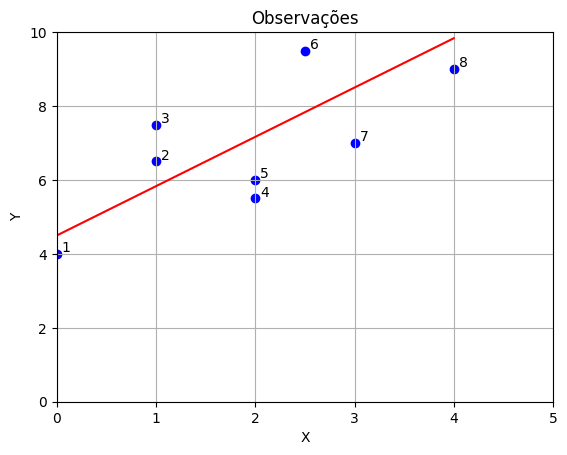

In [49]:
x = [value[0] for value in observations.values()]
y = [value[1] for value in observations.values()]

y_pred = [sol[a] * x_i[0] + sol[b] for x_i in observations.values()]

plt.scatter(x, y, color='blue', marker='o')
plt.plot(x, y_pred, color='red')
for label, (xi, yi) in observations.items():
    plt.text(xi + 0.05, yi + 0.05, label) 

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Observações')

plt.grid(True)
plt.xlim(0, 5)
plt.ylim(0, 10)
plt.show()